# Outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
data = pd.read_csv(r'raw_sales.csv')

In [4]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
data.isna().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [48]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to append anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    
    # 3-standard deviation
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [ ]:
def remove_outliers(data):
    # Set upper and lower limit to 3 standard deviations
    data_std = statistics.stdev(data)
    data_mean = statistics.mean(data)
    
    # 3-standard deviation
    anomaly_cut_off = data_std * 3
    
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    
    # Filter the data to remove outliers
    filtered_data = [value for value in data if lower_limit <= value <= upper_limit]
    
    return filtered_data

In [33]:
def remove_outliers_with_fences(data, k=1.5):
    # Calculate quartiles using numpy
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Filter the data to remove outliers
    filtered_data = [value for value in data if lower_fence <= value <= upper_fence]

    return filtered_data

In [51]:
def remove_outliers_with_fences(data, k=1.5):
    # Calculate quartiles
    Q1 = statistics.quantiles(data, n=4)[0]
    Q3 = statistics.quantiles(data, n=4)[2]

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Filter the data to remove outliers
    filtered_data = [value for value in data if lower_fence <= value <= upper_fence]

    return filtered_data

In [8]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

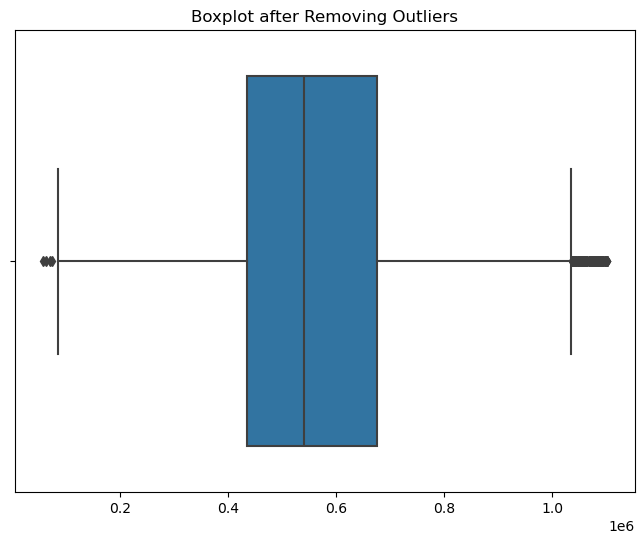

In [53]:
list_1 = remove_outliers_with_fences(data['price'])
# Create a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=list_1)
plt.title('Boxplot after Removing Outliers')
plt.show()

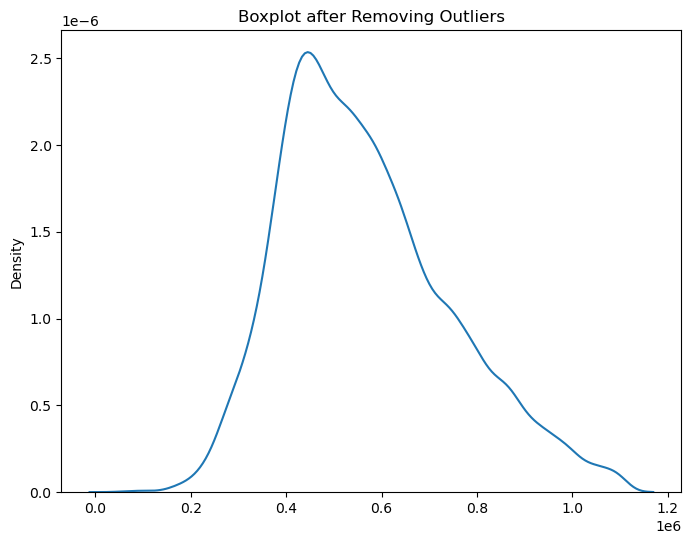

In [54]:
list_1 = remove_outliers_with_fences(data['price'])
# Create a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(x=list_1)
plt.title('Boxplot after Removing Outliers')
plt.show()

In [50]:

len(list_1)

461

In [10]:
# total number of outliers

len(list_1)

461

In [11]:
len(data)

29580

In [39]:
data.price.skew()

AttributeError: 'list' object has no attribute 'skew'

<Axes: xlabel='price', ylabel='Density'>

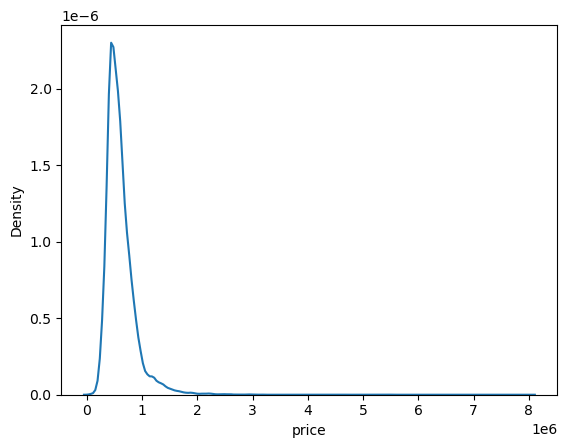

In [46]:
sns.kdeplot(data.price)

In [14]:
data['price_transformed'] = np.log(data.price)

In [15]:
data.price_transformed.skew()

0.4731646269984763

In [16]:
list_2 = find_anomalies(data.price_transformed)

In [17]:
len(list_2)

266

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


<Axes: xlabel='price_transformed', ylabel='Density'>

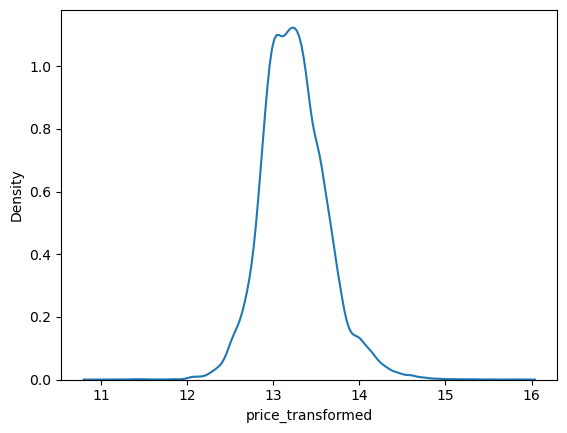

In [19]:
sns.kdeplot(data.price_transformed)

In [20]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [21]:
data['price_transformed_double'].skew()

0.33092530655758573

In [22]:
list_3 = find_anomalies(data.price_transformed_double)

In [25]:
len(list_3)

251

# Boxplot

<Axes: >

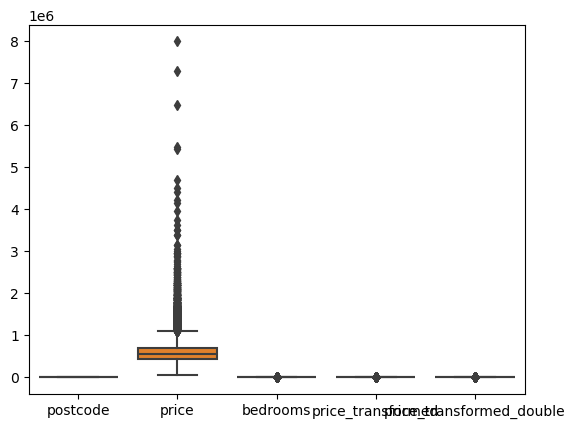

In [24]:
sns.boxplot(data=data)